# 서울 관서별 범죄율 분석

**3조 : 조은 강도형, 고종윤, 성민석**

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.rcsetup
matplotlib.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['axes.unicode_minus']=False

## 1. 데이터 파일 불러오기
우리가 불러온 데이터는 다음과 같다

In [83]:
df = pd.read_csv('crime_in_Seoul.csv', engine='python', index_col = '관서명',encoding='euc-kr',thousands=',')
df

,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
관서명,,,,,,,,,,
중부서,2,2,3,2,105,65,1395,477,1355,1170
종로서,3,3,6,5,115,98,1070,413,1278,1070
남대문서,1,0,6,4,65,46,1153,382,869,794
서대문서,2,2,5,4,154,124,1812,738,2056,1711
혜화서,3,2,5,4,96,63,1114,424,1015,861
용산서,5,5,14,14,194,173,1557,587,2050,1704
성북서,2,2,2,1,86,71,953,409,1194,1015
동대문서,5,5,13,13,173,146,1981,814,2548,2227
마포서,8,8,14,10,294,247,2555,813,2983,2519


## 2. 전체 관서별 범죄 검거현황

In [84]:
df3 = {'살인검거율':(round(df['살인 검거'] / pd.to_numeric(df['살인 발생']) * 100,2)), 
         '강도검거율':(round(df['강도 검거'] / pd.to_numeric(df['강도 발생']) * 100,2)),
         '강간검거율':(round(df['강간 검거'] / pd.to_numeric(df['강간 발생']) * 100,2)),
         '절도검거율':(round(df['절도 검거'] / pd.to_numeric(df['절도 발생']) * 100,2)),
         '폭력검거율':(round(df['폭력 검거'] / pd.to_numeric(df['폭력 발생']) * 100,2))
        }
df3 = pd.DataFrame(df3)
df3[df3>100]=100
df3.replace(0,0.1)
df3
# 검거율 데이터 프레임

,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
관서명,,,,,
중부서,100.00,66.67,61.90,34.19,86.35
종로서,100.00,83.33,85.22,38.60,83.72
남대문서,0.00,66.67,70.77,33.13,91.37
서대문서,100.00,80.00,80.52,40.73,83.22
혜화서,66.67,80.00,65.62,38.06,84.83
용산서,100.00,100.00,89.18,37.70,83.12
성북서,100.00,50.00,82.56,42.92,85.01
동대문서,100.00,100.00,84.39,41.09,87.40
마포서,100.00,71.43,84.01,31.82,84.45


## 3. 각 범죄별 TOP5 ( 동네별 )
**낮은 검거율순**으로 나열, 이를 통해 범죄 취약 지역을 파악 가능

In [85]:
df4 = {'살인검거율':(df3.sort_values('살인검거율').index[:5]), 
         '강도검거율':(df3.sort_values('강도검거율').index[:5]),
         '강간검거율':(df3.sort_values('강간검거율').index[:5]),
         '절도검거율':(df3.sort_values('절도검거율').index[:5]),
         '폭력검거율':(df3.sort_values('폭력검거율').index[:5])
        }
df4 = pd.DataFrame(df4,index =[1,2,3,4,5])
df4
# 검거율 낮은순으로 정렬한거 데이터 프레임

,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
1,남대문서,양천서,동작서,방배서,관악서
2,서초서,서부서,서초서,관악서,구로서
3,혜화서,성북서,구로서,마포서,양천서
4,수서서,동작서,노원서,영등포서,종암서
5,구로서,서초서,중부서,남대문서,강동서


## 4. 흉악 범죄 발생비중 (%)
흉악 범죄 비율를 다음과 같이 정의하여 아래와 같은 분석하였다.
> 흉악 범죄 = 살인 및 강도 발생건수 / 전체 범죄발생 건수

#### 흉악범죄 비율 취약 지역 : 영등포

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


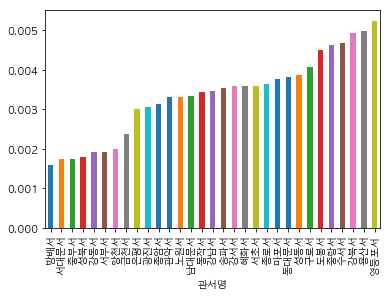

In [86]:
df5 = df.iloc[:,0::2]
df5.sum(axis=1)
df5['살인 및 강도 발생율'] = (df5.iloc[:,1]+df5.iloc[:,0])/df5.sum(axis=1)
sr = df5['살인 및 강도 발생율'].sort_values()
sr.sort_values(ascending=False)*100
# (살인 및 강도 발생율)/(전체 범죄 발생율) 
# 살인 및 강도 발생 비율 높은 순으로 정렬
sr.plot(kind='bar')
plt.show()

## 5. 총 범죄 점수
각 점수는 다음과 같이 반영하였다.
> 전체 범죄발생 / 해당 범죄발생

각 범죄를 다음과 같은 점수로 부여하여 총 범죄 점수를 반영하여 범죄에 취약한 지역을 파악해보았다.
>살인 : **775.4**점  
>강도 : **457.9**점  
>강간 : **23.1**점  
>절도 : **2.2**점  
>폭력 : **1.9**점 


In [87]:
df2 = df.iloc[:,0::2]
df2.sum().sum()
for i in range(5):
    print(round(df2.sum().sum()/df2.sum()[i],1),'점')
# 범죄점수 계산방법!!
# 살인/ 강도/ 강간/ 절도/ 폭력

775.5 점
458.0 점
23.2 점
2.3 점
1.9 점


In [88]:
df3

,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
관서명,,,,,
중부서,100.00,66.67,61.90,34.19,86.35
종로서,100.00,83.33,85.22,38.60,83.72
남대문서,0.00,66.67,70.77,33.13,91.37
서대문서,100.00,80.00,80.52,40.73,83.22
혜화서,66.67,80.00,65.62,38.06,84.83
용산서,100.00,100.00,89.18,37.70,83.12
성북서,100.00,50.00,82.56,42.92,85.01
동대문서,100.00,100.00,84.39,41.09,87.40
마포서,100.00,71.43,84.01,31.82,84.45


In [89]:
df3['범죄점수'] = df3['살인검거율']*775.5 +df3['강도검거율']*458.0 + df3['강간검거율']*23.1 + df3['절도검거율']*2.28 + df3['폭력검거율']*1.9

### 가장 높은 범죄점수 : 남대문서
총 범죄 점수가 순으로 **남대문서,서초서,혜화서,구로서,서부서**이다.

In [90]:
df1 = df3.sort_values(by='범죄점수', ascending=True)
df

,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
관서명,,,,,,,,,,
중부서,2,2,3,2,105,65,1395,477,1355,1170
종로서,3,3,6,5,115,98,1070,413,1278,1070
남대문서,1,0,6,4,65,46,1153,382,869,794
서대문서,2,2,5,4,154,124,1812,738,2056,1711
혜화서,3,2,5,4,96,63,1114,424,1015,861
용산서,5,5,14,14,194,173,1557,587,2050,1704
성북서,2,2,2,1,86,71,953,409,1194,1015
동대문서,5,5,13,13,173,146,1981,814,2548,2227
마포서,8,8,14,10,294,247,2555,813,2983,2519


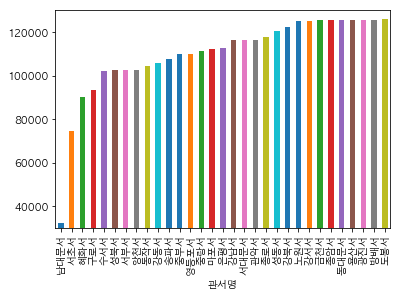

In [91]:
df1['범죄점수'].plot(kind='bar')
plt.ylim([30000,130000])
plt.show()

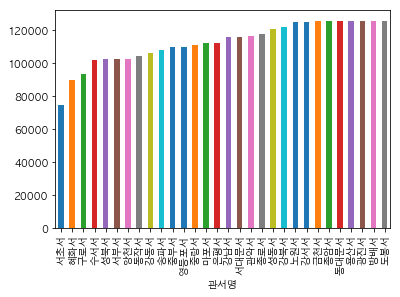

In [92]:
## 남대문서 제외
df1['범죄점수'].drop('남대문서').plot(kind='bar')
plt.show()

## 결론 및 한계점

총 범죄 점수를 통해서 **남대문서가 가장 범죄에 취약하다**는 것을 확인할 수 있었다.

또한, **Top5에 드는 지역이 총 점수도 드는 것을 확인**할 수 있었다.

하지만 이는 범죄 점수를 부여하는데 **한계가 있었음**을 알 수 있었다. 또한 

남대문서는 단 한 건의 살인사건을 검거하지 못했다는 점 때문에 범죄점수에서 너무 낮은 점수를 받았다. 우리는 이를 **이상점으로 생각하고 남대문서를 차트에서 제외**한다

**서초서의 경우 타지역 경찰서에 비해 흉악범죄의 검거율 뿐만 아니라 경범죄의 검거율 또한 낮다.** 

검거율로만 보았을 때 서초지역은 다른지역에 비해 치안이 불안전하다고 볼 수 있다.

하지만 서초지역의 경우 흉악범죄의 비중도 낮고 절대적인 범죄 발생 횟수의 빈도 역시 크게 높다고 볼 수 없으므로 **서초지역이 치안이 불안전하다고 일반화 할 수는 없다.**